<a href="https://colab.research.google.com/github/Elizabeth-778/Adversarial-attacks/blob/main/one_pixel_attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
y_train[2]

4

8


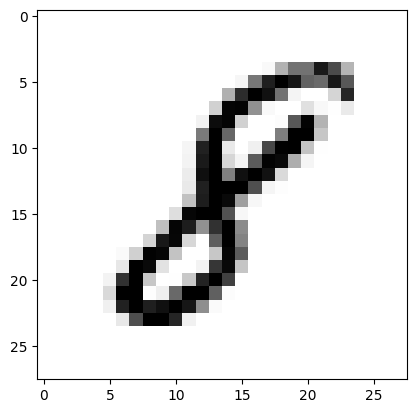

In [ ]:
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(X_train[image_index], cmap='Greys')

In [ ]:
# Reshaping the array to 4-dims so that it can work with the Keras API
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
X_train /= 255
X_test /= 255
print('x_train shape:', X_train.shape)
print('Number of images in x_train', X_train.shape[0])
print('Number of images in x_test', X_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [ ]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x=X_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2072 - accuracy: 0.9385
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0841 - accuracy: 0.9738
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0567 - accuracy: 0.9822
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0432 - accuracy: 0.9860
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0357 - accuracy: 0.9882
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0286 - accuracy: 0.9904
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0236 - accuracy: 0.9919
Epoch 8/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0218 - accuracy: 0.9926
Epoch 9/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0196 - accuracy: 0.9935
Epoch 10/10
1875/1875 [==============================] - 22s 12m

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0664 - accuracy: 0.9846


[0.06639742106199265, 0.9846000075340271]

1/1 [==============================] - 0s 85ms/step
4
[[5.2326336e-06 1.0074942e-15 8.8285111e-07 2.2296167e-18 9.9999332e-01
  4.3145117e-14 5.3278467e-07 2.2256465e-12 9.1406045e-17 2.4071726e-12]]


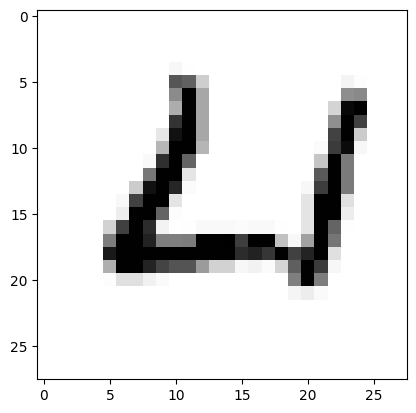

In [ ]:
image_index = 33
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())
print(pred) #probability vector

In [ ]:
import numpy as np
from scipy.optimize import differential_evolution

def one_pixel_attack(model, image, label, bounds):
    # Define the objective function for the attack
    def objective_function(x):
        # Reshape the 1D array to match the image shape
        perturbed_image = x.reshape(image.shape)

        # Predict the class probabilities for the perturbed image
        predictions = model.predict(np.array([perturbed_image]))

        # Return the negative probability of the target class
        target_class_prob = predictions[0][label]
        return -target_class_prob

    # Perform differential evolution optimization
    result = differential_evolution(objective_function, bounds)

    # Get the best solution found
    best_solution = result.x.reshape(image.shape)

    return best_solution


In [ ]:
X_test[33].shape

(28, 28, 1)

In [ ]:
import numpy as np
from scipy.optimize import differential_evolution

def one_pixel_attack(model, image, label, bounds):
    # Define the objective function for the attack
    def objective_function(x):
        # Reshape the 1D array to match the image shape
        perturbed_image = x.reshape(image.shape)

        # Predict the class probabilities for the perturbed image
        predictions = model.predict(np.array([perturbed_image]))

        # Return the negative probability of the target class
        target_class_prob = predictions[0][label]
        return -target_class_prob

    # Perform differential evolution optimization
    result = differential_evolution(objective_function, bounds)

    # Get the best solution found
    best_solution = result.x.reshape(image.shape)

    return best_solution

In [ ]:
image = X_test[33]
label = y_test[33]
bounds = [(0, 255)] * image.size
perturbed_image = one_pixel_attack(model, image, label, bounds)

1/1 [==============================] - 0s 18ms/step



KeyboardInterrupt

